✅ Advanced Dataset Generated!
Class Balance (Risk vs Safe):
 Loan_Status
0    0.5905
1    0.4095
Name: proportion, dtype: float64

⚖️ Applying SMOTE to handle imbalance...

🔄 Training Advanced Gradient Boosting Model...

🏆 --- FINAL EVALUATION ---
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       238
           1       0.77      0.77      0.77       162

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400

ROC-AUC Score: 0.8060


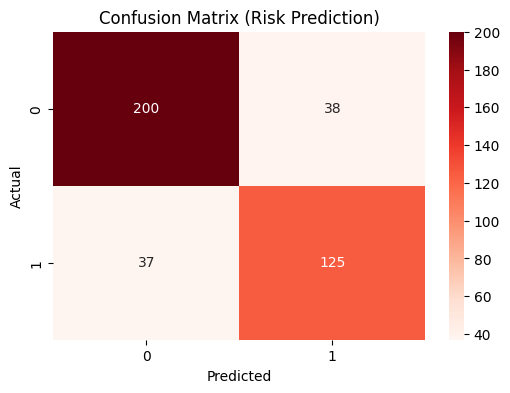


✅ All files saved! Download: model, scaler, and encoders.


In [ ]:
# ==========================================
#  PROJECT 2: CREDIT RISK PREDICTION SYSTEM
# ==========================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE # For handling class imbalance
import joblib

# 1. Generate Realistic Financial Data
# We create 2000 loan applicants with complex relationships
np.random.seed(42)
n_samples = 2000

data = {
    'Age': np.random.randint(21, 65, n_samples),
    'Income': np.random.randint(25000, 150000, n_samples),
    'Loan_Amount': np.random.randint(5000, 50000, n_samples),
    'Credit_Score': np.random.randint(300, 850, n_samples),
    'Employment_Length': np.random.randint(0, 40, n_samples),
    'Home_Ownership': np.random.choice(['Rent', 'Mortgage', 'Own'], n_samples),
    'Loan_Intent': np.random.choice(['Personal', 'Education', 'Medical', 'Venture'], n_samples),
    'Previous_Defaults': np.random.choice([0, 1], n_samples, p=[0.8, 0.2]) # 20% have defaulted before
}

df = pd.DataFrame(data)

# Feature Engineering: Debt-to-Income Ratio (DTI)
# (Simple approximation: Loan / Income)
df['DTI_Ratio'] = df['Loan_Amount'] / df['Income']

# Define Target: Risk (1 = Default/High Risk, 0 = Payback/Low Risk)
# Logic: Low credit score + High Loan + Previous Default = High Risk
def assign_risk(row):
    risk_score = 0
    if row['Credit_Score'] < 600: risk_score += 3
    if row['DTI_Ratio'] > 0.4: risk_score += 2
    if row['Previous_Defaults'] == 1: risk_score += 2
    if row['Income'] < 40000: risk_score += 1

    # Add randomness
    risk_score += np.random.randint(-1, 2)

    return 1 if risk_score >= 4 else 0

df['Loan_Status'] = df.apply(assign_risk, axis=1)

print("✅ Advanced Dataset Generated!")
print("Class Balance (Risk vs Safe):\n", df['Loan_Status'].value_counts(normalize=True))


#  STEP 2: PREPROCESSING


# 1. Encode Categorical Variables
le_home = LabelEncoder()
le_intent = LabelEncoder()
df['Home_Ownership'] = le_home.fit_transform(df['Home_Ownership'])
df['Loan_Intent'] = le_intent.fit_transform(df['Loan_Intent'])

# 2. Split Data
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Handle Imbalance using SMOTE (Requested in PDF)
# This creates synthetic examples of "High Risk" people so the model learns better
print("\n⚖️ Applying SMOTE to handle imbalance...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 4. Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# ==========================================
# 🧠 STEP 3: MODEL TRAINING (Gradient Boosting)
# ==========================================
print("\n🔄 Training Advanced Gradient Boosting Model...")
# Gradient Boosting is often better for tabular financial data than Random Forest
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train_scaled, y_train_resampled)


#STEP 4: EVALUATION

y_pred = model.predict(X_test_scaled)

print("\n🏆 --- FINAL EVALUATION ---")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred):.4f}")

# Confusion Matrix Plot
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix (Risk Prediction)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#STEP 5: SAVE ASSETS

joblib.dump(model, 'credit_risk_model.pkl')
joblib.dump(scaler, 'credit_scaler.pkl')
# Save Encoders too (Needed for the App!)
joblib.dump(le_home, 'le_home.pkl')
joblib.dump(le_intent, 'le_intent.pkl')

print("\n✅ All files saved! Download: model, scaler, and encoders.")